### ***PROJECT ON REVENUE PREDICTON***


##### ***Machine Learning Model to predict the revenue*** 
##### ***Also deploy the model into Python GUI application to fetch realtime queries over it.***

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data=pd.read_csv('train.csv',index_col=0)
test_data=pd.read_csv('test.csv',index_col=0)

In [4]:
train_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open Date   137 non-null    object 
 1   City        137 non-null    object 
 2   City Group  137 non-null    object 
 3   Type        137 non-null    object 
 4   P1          137 non-null    int64  
 5   P2          137 non-null    float64
 6   P3          137 non-null    float64
 7   P4          137 non-null    float64
 8   P5          137 non-null    int64  
 9   P6          137 non-null    int64  
 10  P7          137 non-null    int64  
 11  P8          137 non-null    int64  
 12  P9          137 non-null    int64  
 13  P10         137 non-null    int64  
 14  P11         137 non-null    int64  
 15  P12         137 non-null    int64  
 16  P13         137 non-null    float64
 17  P14         137 non-null    int64  
 18  P15         137 non-null    int64  
 19  P16         137 non-null    i

In [6]:
train_data.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [7]:
test_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
Id,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,2.0,3.0,0,0,0,0,0,0,0,0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,2.0,3.0,0,4,0,0,0,0,0,0
4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,5.0,3.0,0,0,0,0,0,0,0,0


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Open Date   100000 non-null  object 
 1   City        100000 non-null  object 
 2   City Group  100000 non-null  object 
 3   Type        100000 non-null  object 
 4   P1          100000 non-null  int64  
 5   P2          100000 non-null  float64
 6   P3          100000 non-null  float64
 7   P4          100000 non-null  float64
 8   P5          100000 non-null  int64  
 9   P6          100000 non-null  int64  
 10  P7          100000 non-null  int64  
 11  P8          100000 non-null  int64  
 12  P9          100000 non-null  int64  
 13  P10         100000 non-null  int64  
 14  P11         100000 non-null  int64  
 15  P12         100000 non-null  int64  
 16  P13         100000 non-null  float64
 17  P14         100000 non-null  int64  
 18  P15         100000 non-null  int64  
 19  P16

In [9]:
test_data.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.088030,4.428085,4.215325,4.396025,1.989590,2.881900,5.30051,4.93100,5.251380,5.458970,...,3.233785,3.084000,2.083300,1.193330,1.942640,0.987430,2.108670,1.832830,1.968890,0.973500
std,2.812963,1.428865,0.842161,1.035827,1.065314,1.531429,2.17858,1.71849,1.702632,1.763601,...,2.136694,1.783927,4.309479,2.307944,3.971298,1.534808,4.685414,3.228769,3.805773,1.677267
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.00000,4.000000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.750000,4.000000,4.000000,1.000000,2.000000,5.00000,4.00000,4.000000,5.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.00000,5.00000,5.000000,5.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,5.00000,5.00000,5.000000,5.000000,...,4.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
max,15.000000,7.500000,6.000000,7.500000,6.000000,10.000000,10.00000,10.00000,10.000000,10.000000,...,12.500000,10.000000,25.000000,15.000000,25.000000,6.000000,30.000000,15.000000,20.000000,8.000000


In [10]:
train_data.shape

(137, 42)

In [11]:
test_data.shape

(100000, 41)

<AxesSubplot:>

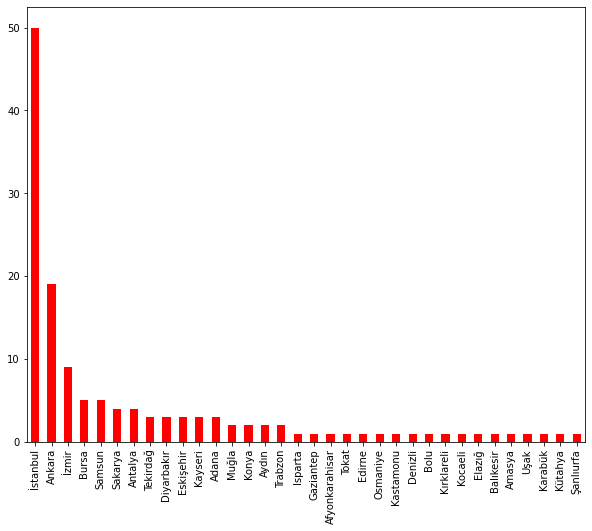

In [12]:
plt.figure(figsize=(10,8))
train_data['City'].value_counts().plot.bar(color='r')

<AxesSubplot:>

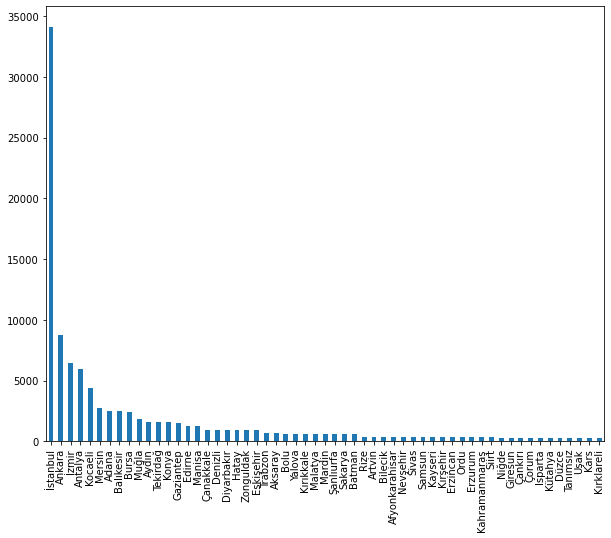

In [13]:
plt.figure(figsize=(10,8))
test_data['City'].value_counts().plot.bar()

<AxesSubplot:>

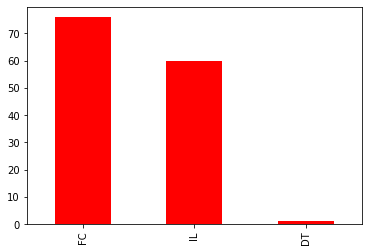

In [14]:
train_data['Type'].value_counts().plot.bar(color='r')

<AxesSubplot:>

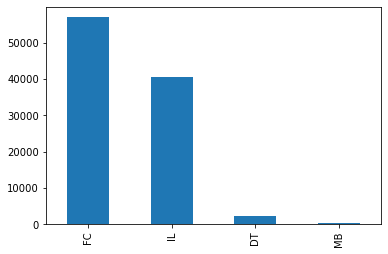

In [15]:
test_data['Type'].value_counts().plot.bar()

<AxesSubplot:>

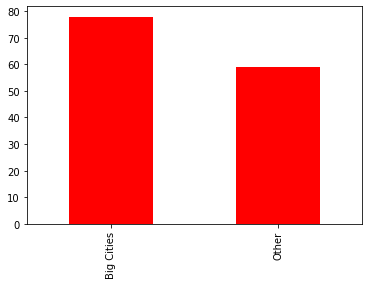

In [16]:
train_data['City Group'].value_counts().plot.bar(color='r')

<AxesSubplot:>

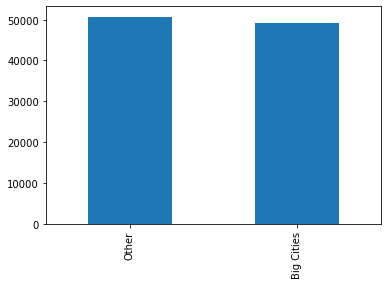

In [17]:
test_data['City Group'].value_counts().plot.bar()

In [18]:
test_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
Id,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,2.0,3.0,0,0,0,0,0,0,0,0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,2.0,3.0,0,4,0,0,0,0,0,0
4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,5.0,3.0,0,0,0,0,0,0,0,0


In [19]:
test_data=pd.concat([test_data,pd.get_dummies(test_data['Type'])],axis=1)
test_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P32,P33,P34,P35,P36,P37,DT,FC,IL,MB
Id,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,1,0,0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,0,1,0
2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,...,0,0,0,0,0,0,0,1,0,0
3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,...,0,0,0,0,0,0,0,0,1,0
4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,1,0,0


In [20]:
test_data.drop('MB',axis=1,inplace=True)

In [21]:
test_data.drop('Type',axis=1,inplace=True)

In [22]:
test_data.head()


,Open Date,City,City Group,P1,P2,P3,P4,P5,P6,P7,...,P31,P32,P33,P34,P35,P36,P37,DT,FC,IL
Id,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,Niğde,Other,1,4.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,1,0
1,03/18/2011,Konya,Other,3,4.0,4.0,4.0,2,2,5,...,0,0,0,0,0,0,0,0,0,1
2,10/30/2013,Ankara,Big Cities,3,4.0,4.0,4.0,2,2,5,...,0,0,0,0,0,0,0,0,1,0
3,05/06/2013,Kocaeli,Other,2,4.0,4.0,4.0,2,3,5,...,4,0,0,0,0,0,0,0,0,1
4,07/31/2013,Afyonkarahisar,Other,2,4.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,1,0


In [23]:
train_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [24]:
train_data=pd.concat([train_data,pd.get_dummies(train_data['Type'])],axis=1)
train_data.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P32,P33,P34,P35,P36,P37,revenue,DT,FC,IL
Id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,4,5,5,4,3,4,5653753.0,0,0,1
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,0,6923131.0,0,1,0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,0,2055379.0,0,0,1
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,10,6,18,12,12,6,2675511.0,0,0,1
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3,2,3,4,3,3,4316715.0,0,0,1


In [25]:
train_data.drop('Type',axis=1,inplace=True)

In [26]:
test_data['Big Cities']=pd.get_dummies(test_data['City Group'],drop_first=True)

In [27]:
test_data.drop('City Group',axis=1,inplace=True)

In [28]:
test_data.head()

,Open Date,City,P1,P2,P3,P4,P5,P6,P7,P8,...,P32,P33,P34,P35,P36,P37,DT,FC,IL,Big Cities
Id,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,Niğde,1,4.0,4.0,4.0,1,2,5,4,...,0,0,0,0,0,0,0,1,0,1
1,03/18/2011,Konya,3,4.0,4.0,4.0,2,2,5,3,...,0,0,0,0,0,0,0,0,1,1
2,10/30/2013,Ankara,3,4.0,4.0,4.0,2,2,5,4,...,0,0,0,0,0,0,0,1,0,0
3,05/06/2013,Kocaeli,2,4.0,4.0,4.0,2,3,5,4,...,0,0,0,0,0,0,0,0,1,1
4,07/31/2013,Afyonkarahisar,2,4.0,4.0,4.0,1,2,5,4,...,0,0,0,0,0,0,0,1,0,1


In [29]:
train_data['Big Cities']=pd.get_dummies(train_data['City Group'],drop_first=True)
train_data.drop('City Group',axis=1,inplace=True)
train_data.head()

,Open Date,City,P1,P2,P3,P4,P5,P6,P7,P8,...,P33,P34,P35,P36,P37,revenue,DT,FC,IL,Big Cities
Id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,İstanbul,4,5.0,4.0,4.0,2,2,5,4,...,5,5,4,3,4,5653753.0,0,0,1,0
1,02/14/2008,Ankara,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,6923131.0,0,1,0,0
2,03/09/2013,Diyarbakır,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,2055379.0,0,0,1,1
3,02/02/2012,Tokat,6,4.5,6.0,6.0,4,4,10,8,...,6,18,12,12,6,2675511.0,0,0,1,1
4,05/09/2009,Gaziantep,3,4.0,3.0,4.0,2,2,5,5,...,2,3,4,3,3,4316715.0,0,0,1,1


In [30]:
test_data=pd.concat([test_data,pd.get_dummies(test_data['City'])],axis=1)
test_data.head()

,Open Date,City,P1,P2,P3,P4,P5,P6,P7,P8,...,Trabzon,Uşak,Yalova,Zonguldak,Çanakkale,Çankırı,Çorum,İstanbul,İzmir,Şanlıurfa
Id,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,Niğde,1,4.0,4.0,4.0,1,2,5,4,...,0,0,0,0,0,0,0,0,0,0
1,03/18/2011,Konya,3,4.0,4.0,4.0,2,2,5,3,...,0,0,0,0,0,0,0,0,0,0
2,10/30/2013,Ankara,3,4.0,4.0,4.0,2,2,5,4,...,0,0,0,0,0,0,0,0,0,0
3,05/06/2013,Kocaeli,2,4.0,4.0,4.0,2,3,5,4,...,0,0,0,0,0,0,0,0,0,0
4,07/31/2013,Afyonkarahisar,2,4.0,4.0,4.0,1,2,5,4,...,0,0,0,0,0,0,0,0,0,0


In [31]:
test_data.drop('City',axis=1,inplace=True)
test_data.head()

,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,Trabzon,Uşak,Yalova,Zonguldak,Çanakkale,Çankırı,Çorum,İstanbul,İzmir,Şanlıurfa
Id,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,1,4.0,4.0,4.0,1,2,5,4,5,...,0,0,0,0,0,0,0,0,0,0
1,03/18/2011,3,4.0,4.0,4.0,2,2,5,3,4,...,0,0,0,0,0,0,0,0,0,0
2,10/30/2013,3,4.0,4.0,4.0,2,2,5,4,4,...,0,0,0,0,0,0,0,0,0,0
3,05/06/2013,2,4.0,4.0,4.0,2,3,5,4,5,...,0,0,0,0,0,0,0,0,0,0
4,07/31/2013,2,4.0,4.0,4.0,1,2,5,4,5,...,0,0,0,0,0,0,0,0,0,0


In [32]:
train_data=pd.concat([train_data,pd.get_dummies(train_data['City'])],axis=1)
train_data.head()

,Open Date,City,P1,P2,P3,P4,P5,P6,P7,P8,...,Osmaniye,Sakarya,Samsun,Tekirdağ,Tokat,Trabzon,Uşak,İstanbul,İzmir,Şanlıurfa
Id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,İstanbul,4,5.0,4.0,4.0,2,2,5,4,...,0,0,0,0,0,0,0,1,0,0
1,02/14/2008,Ankara,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,0,0,0,0
2,03/09/2013,Diyarbakır,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,0,0,0,0
3,02/02/2012,Tokat,6,4.5,6.0,6.0,4,4,10,8,...,0,0,0,0,1,0,0,0,0,0
4,05/09/2009,Gaziantep,3,4.0,3.0,4.0,2,2,5,5,...,0,0,0,0,0,0,0,0,0,0


In [33]:
train_data.drop('City',axis=1,inplace=True)
train_data.head()

,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,Osmaniye,Sakarya,Samsun,Tekirdağ,Tokat,Trabzon,Uşak,İstanbul,İzmir,Şanlıurfa
Id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,4,5.0,4.0,4.0,2,2,5,4,5,...,0,0,0,0,0,0,0,1,0,0
1,02/14/2008,4,5.0,4.0,4.0,1,2,5,5,5,...,0,0,0,0,0,0,0,0,0,0
2,03/09/2013,2,4.0,2.0,5.0,2,3,5,5,5,...,0,0,0,0,0,0,0,0,0,0
3,02/02/2012,6,4.5,6.0,6.0,4,4,10,8,10,...,0,0,0,0,1,0,0,0,0,0
4,05/09/2009,3,4.0,3.0,4.0,2,2,5,5,5,...,0,0,0,0,0,0,0,0,0,0


In [34]:
train_data.columns                         #77

Index(['Open Date', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue', 'DT',
       'FC', 'IL', 'Big Cities', 'Adana', 'Afyonkarahisar', 'Amasya', 'Ankara',
       'Antalya', 'Aydın', 'Balıkesir', 'Bolu', 'Bursa', 'Denizli',
       'Diyarbakır', 'Edirne', 'Elazığ', 'Eskişehir', 'Gaziantep', 'Isparta',
       'Karabük', 'Kastamonu', 'Kayseri', 'Kocaeli', 'Konya', 'Kütahya',
       'Kırklareli', 'Muğla', 'Osmaniye', 'Sakarya', 'Samsun', 'Tekirdağ',
       'Tokat', 'Trabzon', 'Uşak', 'İstanbul', 'İzmir', 'Şanlıurfa'],
      dtype='object')

In [35]:
test_data.columns                         #99

Index(['Open Date', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'DT', 'FC',
       'IL', 'Big Cities', 'Adana', 'Afyonkarahisar', 'Aksaray', 'Ankara',
       'Antalya', 'Artvin', 'Aydın', 'Balıkesir', 'Batman', 'Bilecik', 'Bolu',
       'Bursa', 'Denizli', 'Diyarbakır', 'Düzce', 'Edirne', 'Erzincan',
       'Erzurum', 'Eskişehir', 'Gaziantep', 'Giresun', 'Hatay', 'Isparta',
       'Kahramanmaraş', 'Kars', 'Kayseri', 'Kocaeli', 'Konya', 'Kütahya',
       'Kırklareli', 'Kırıkkale', 'Kırşehir', 'Malatya', 'Manisa', 'Mardin',
       'Mersin', 'Muğla', 'Nevşehir', 'Niğde', 'Ordu', 'Rize', 'Sakarya',
       'Samsun', 'Siirt', 'Sivas', 'Tanımsız', 'Tekirdağ', 'Trabzon', 'Uşak',
       'Yalova', 'Zonguldak', 'Çanakkale', 'Çankırı', 'Çorum', 'İstanbul',
       'İzmir', 'Ş

In [36]:
for i in test_data.columns:
    if((i not in train_data.columns) and (i !='revenue')):
        test_data.drop(i,axis=1,inplace=True)

In [37]:
len(train_data.columns)

77

In [38]:
len(test_data.columns)

70

In [39]:
for i in train_data.columns:
    if((i not in test_data.columns) and (i !='revenue')):
        train_data.drop(i,axis=1,inplace=True)

In [40]:
len(train_data.columns)

71

In [41]:
len(test_data.columns)

70

In [42]:
train_data['Open Date'][0].split()

['07/17/1999']

In [43]:
train_data.head()

,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,Kırklareli,Muğla,Sakarya,Samsun,Tekirdağ,Trabzon,Uşak,İstanbul,İzmir,Şanlıurfa
Id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,4,5.0,4.0,4.0,2,2,5,4,5,...,0,0,0,0,0,0,0,1,0,0
1,02/14/2008,4,5.0,4.0,4.0,1,2,5,5,5,...,0,0,0,0,0,0,0,0,0,0
2,03/09/2013,2,4.0,2.0,5.0,2,3,5,5,5,...,0,0,0,0,0,0,0,0,0,0
3,02/02/2012,6,4.5,6.0,6.0,4,4,10,8,10,...,0,0,0,0,0,0,0,0,0,0
4,05/09/2009,3,4.0,3.0,4.0,2,2,5,5,5,...,0,0,0,0,0,0,0,0,0,0


In [44]:
test_data.head()

,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,Kırklareli,Muğla,Sakarya,Samsun,Tekirdağ,Trabzon,Uşak,İstanbul,İzmir,Şanlıurfa
Id,,,,,,,,,,,,,,,,,,,,,
0,01/22/2011,1,4.0,4.0,4.0,1,2,5,4,5,...,0,0,0,0,0,0,0,0,0,0
1,03/18/2011,3,4.0,4.0,4.0,2,2,5,3,4,...,0,0,0,0,0,0,0,0,0,0
2,10/30/2013,3,4.0,4.0,4.0,2,2,5,4,4,...,0,0,0,0,0,0,0,0,0,0
3,05/06/2013,2,4.0,4.0,4.0,2,3,5,4,5,...,0,0,0,0,0,0,0,0,0,0
4,07/31/2013,2,4.0,4.0,4.0,1,2,5,4,5,...,0,0,0,0,0,0,0,0,0,0


In [45]:
train_data['Date']=train_data['Open Date'].apply(lambda x:int(x.split('/')[0]))

In [46]:
train_data['Month']=train_data['Open Date'].apply(lambda x:int(x.split('/')[1]))

In [47]:
train_data['Year']=train_data['Open Date'].apply(lambda x:int(x.split('/')[2]))

In [48]:
test_data['Date']=test_data['Open Date'].apply(lambda x:int(x.split('/')[0]))
test_data['Month']=test_data['Open Date'].apply(lambda x:int(x.split('/')[1]))
test_data['Year']=test_data['Open Date'].apply(lambda x:int(x.split('/')[2]))

In [49]:
test_data.drop('Open Date',axis=1,inplace=True)

In [50]:
train_data.drop('Open Date',axis=1,inplace=True)

In [51]:
train_data.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Samsun,Tekirdağ,Trabzon,Uşak,İstanbul,İzmir,Şanlıurfa,Date,Month,Year
Id,,,,,,,,,,,,,,,,,,,,,
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,0,0,0,0,1,0,0,7,17,1999
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,0,0,0,0,0,0,0,2,14,2008
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,0,0,0,0,0,0,0,3,9,2013
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,0,0,0,0,0,0,0,2,2,2012
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,0,0,0,0,0,0,0,5,9,2009


In [52]:
test_data.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Samsun,Tekirdağ,Trabzon,Uşak,İstanbul,İzmir,Şanlıurfa,Date,Month,Year
Id,,,,,,,,,,,,,,,,,,,,,
0,1,4.0,4.0,4.0,1,2,5,4,5,5,...,0,0,0,0,0,0,0,1,22,2011
1,3,4.0,4.0,4.0,2,2,5,3,4,4,...,0,0,0,0,0,0,0,3,18,2011
2,3,4.0,4.0,4.0,2,2,5,4,4,5,...,0,0,0,0,0,0,0,10,30,2013
3,2,4.0,4.0,4.0,2,3,5,4,5,4,...,0,0,0,0,0,0,0,5,6,2013
4,2,4.0,4.0,4.0,1,2,5,4,5,4,...,0,0,0,0,0,0,0,7,31,2013


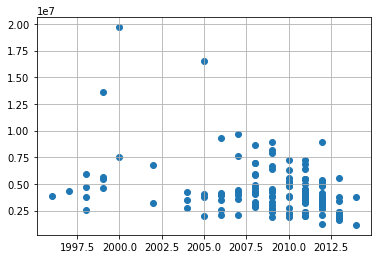

In [53]:
plt.scatter(train_data['Year'],train_data['revenue'])
plt.grid()

In [54]:
import seaborn as sns


count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64


[Text(0.5, 0, 'revenue'), Text(0, 0.5, 'P(revenue)')]

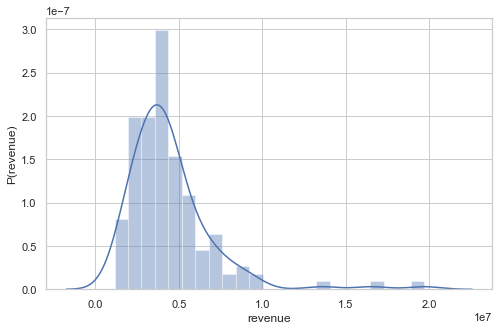

In [55]:
print(train_data['revenue'].describe())
sns.set(style='whitegrid',rc={'figure.figsize':[8,5]})
sns.distplot(train_data['revenue'],norm_hist=False,kde=True).set(xlabel='revenue',ylabel='P(revenue)')

<AxesSubplot:>

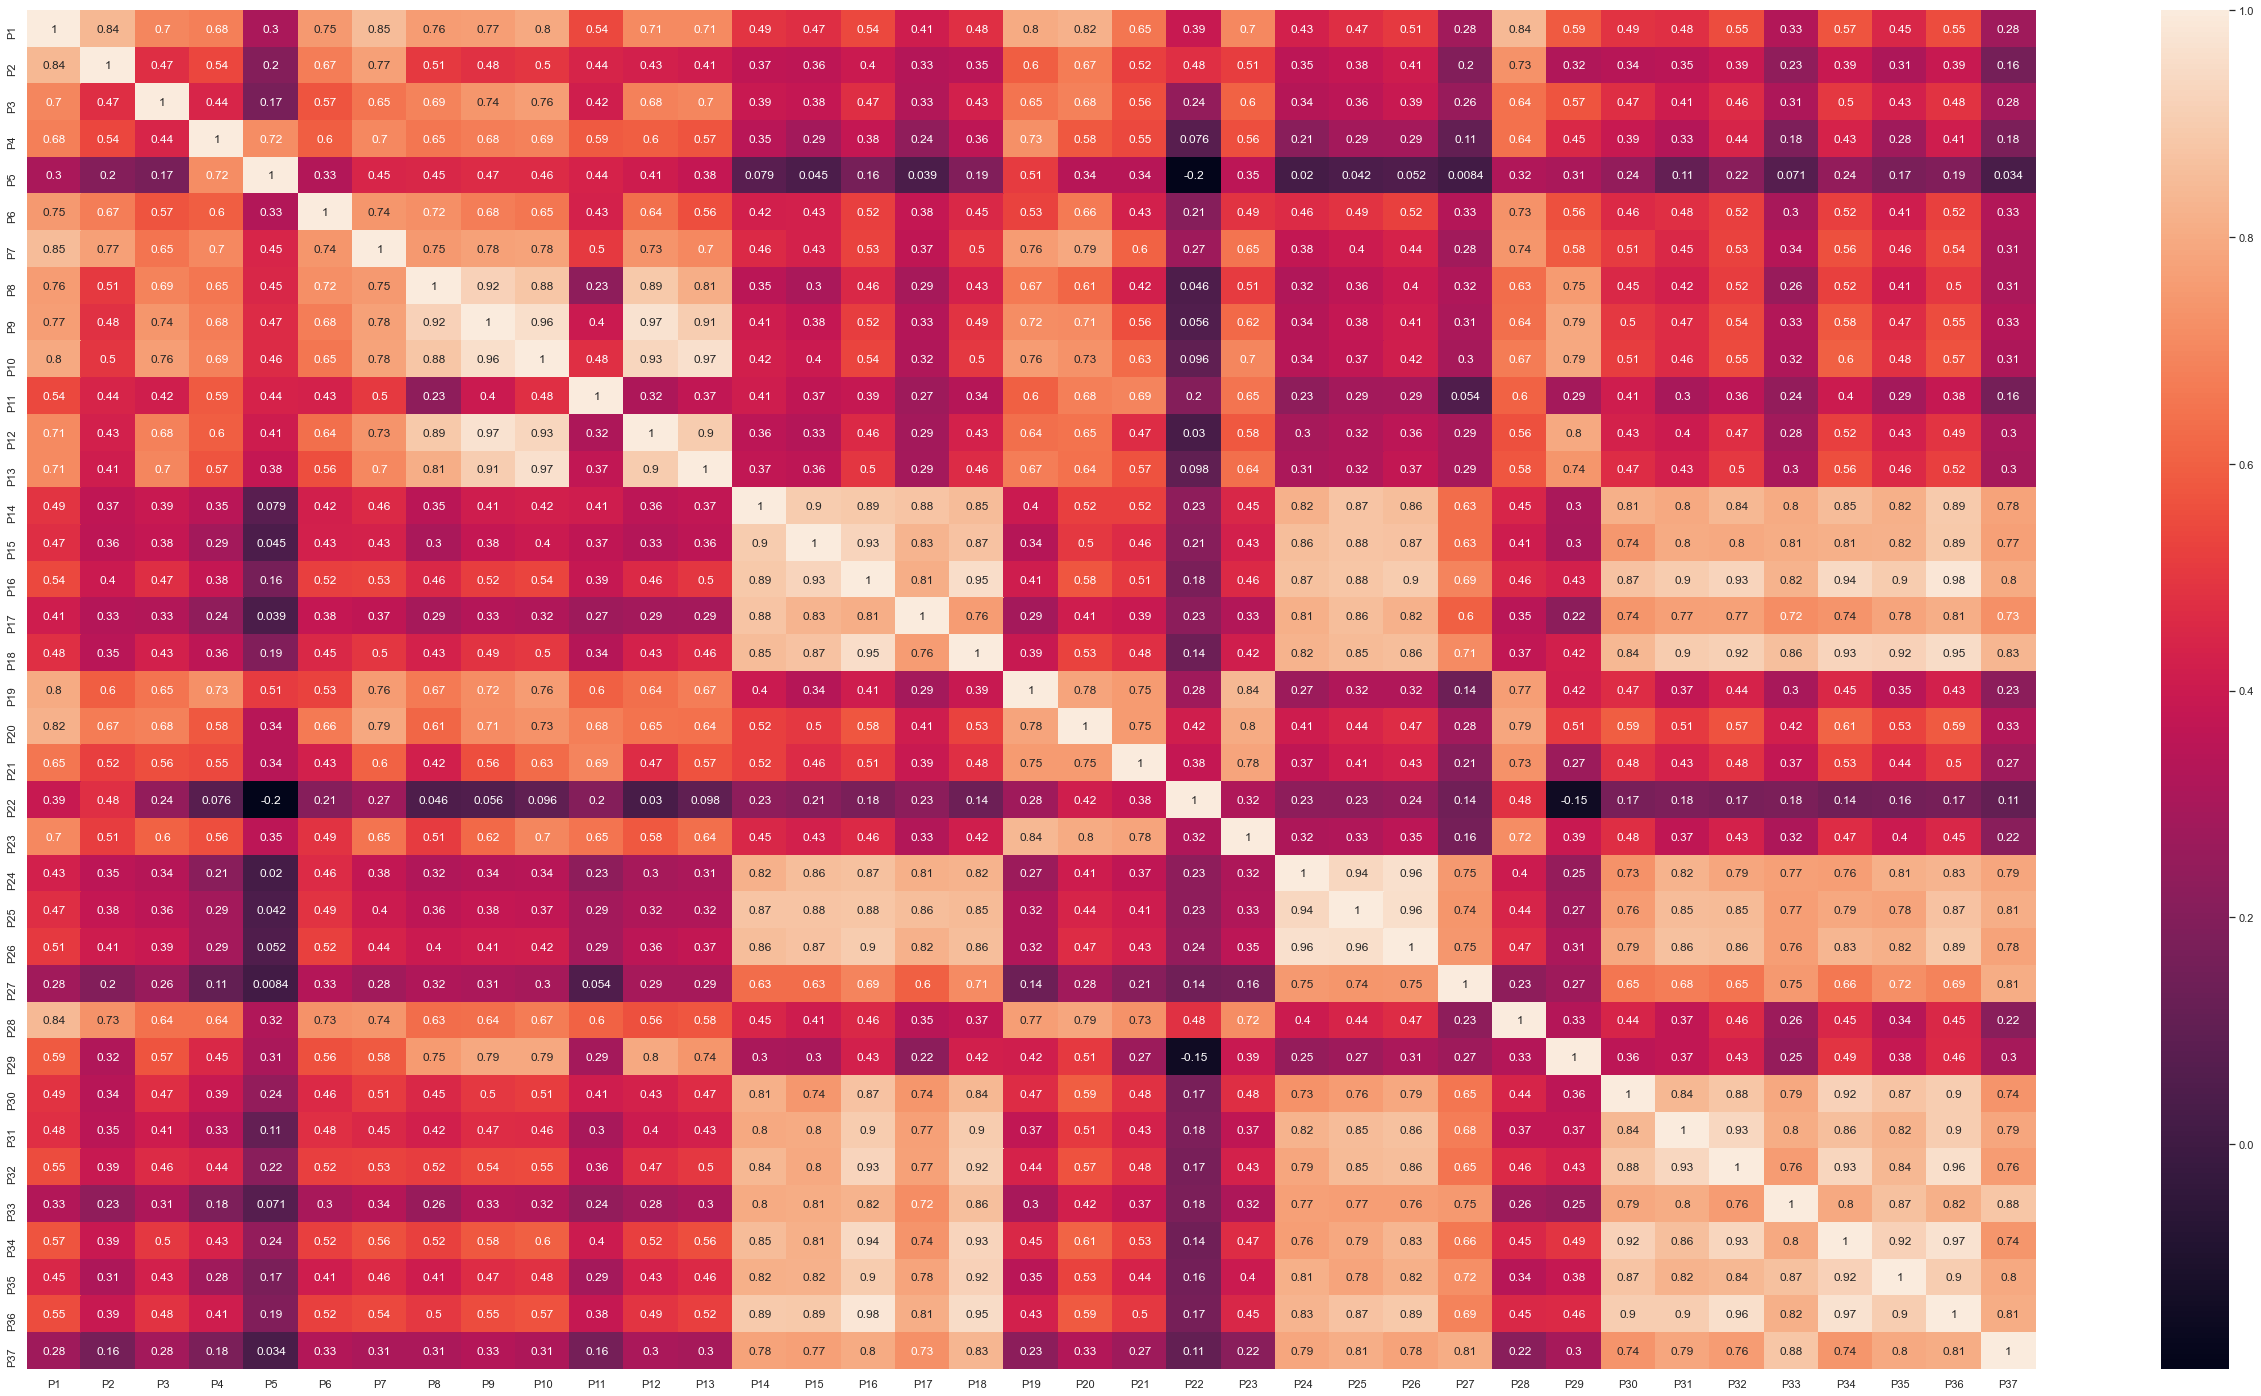

In [56]:
df=train_data[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37']]
corrMatrix=df.corr()
plt.figure(figsize=(45,25))
sns.heatmap(corrMatrix,annot=True)

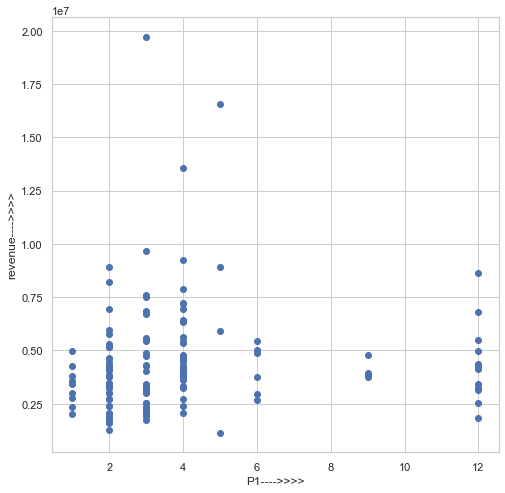

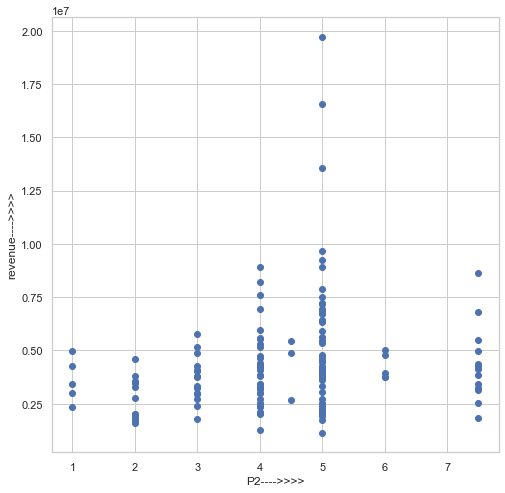

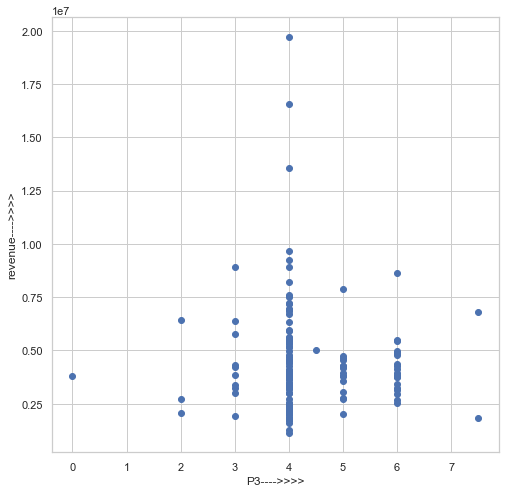

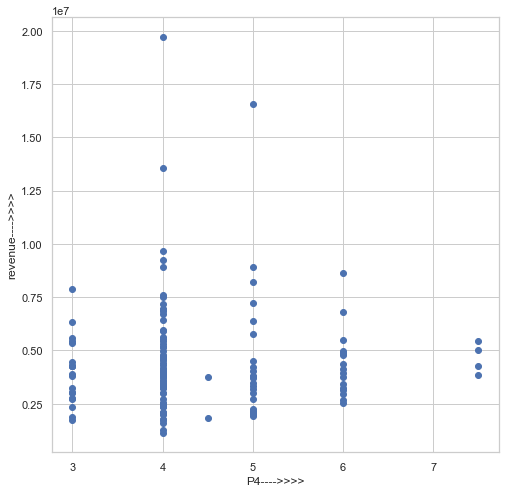

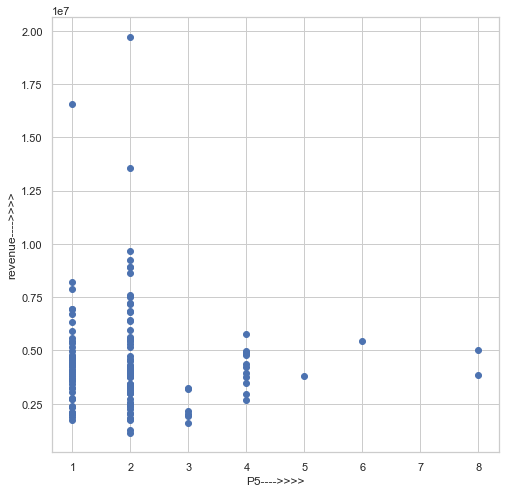

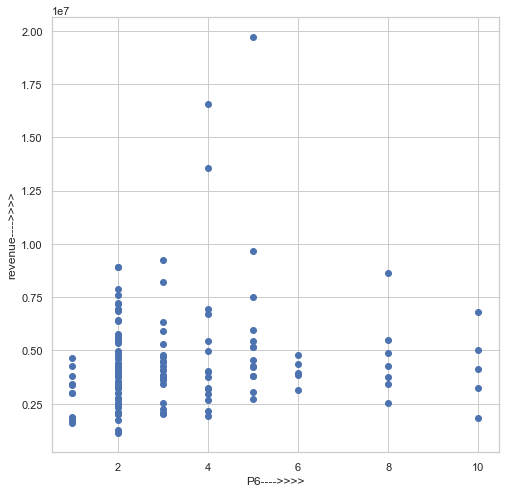

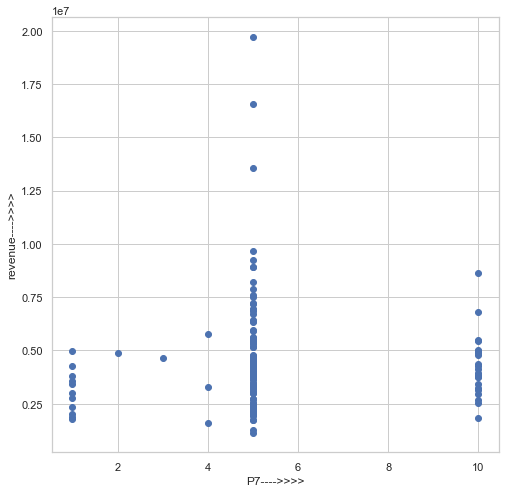

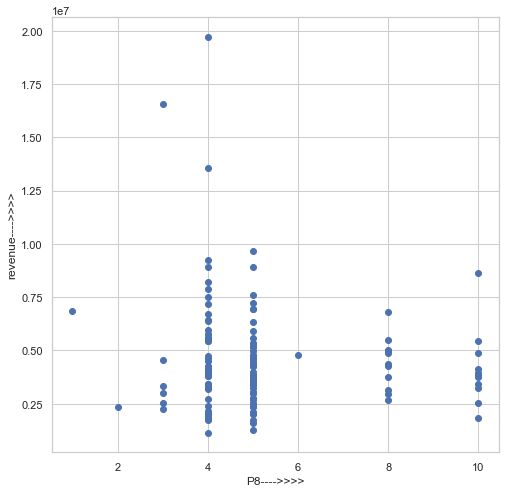

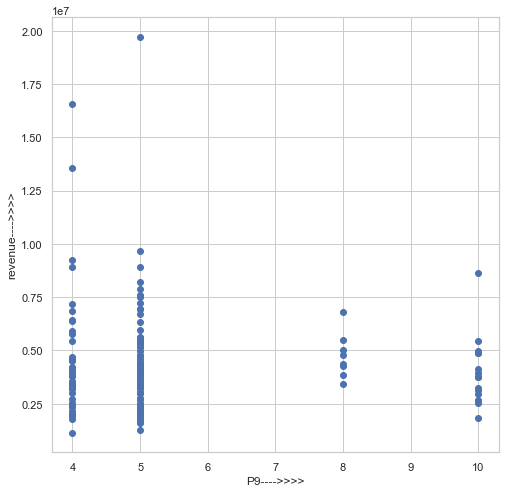

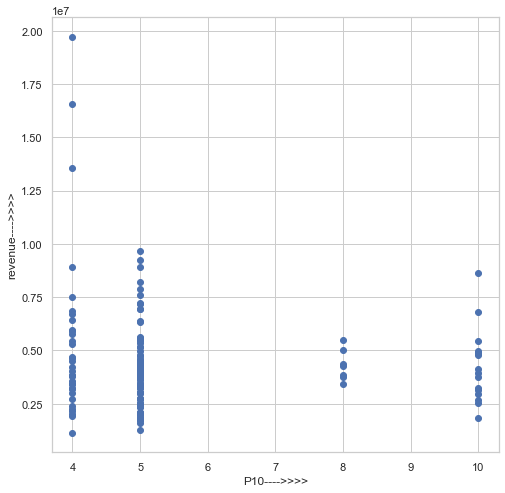

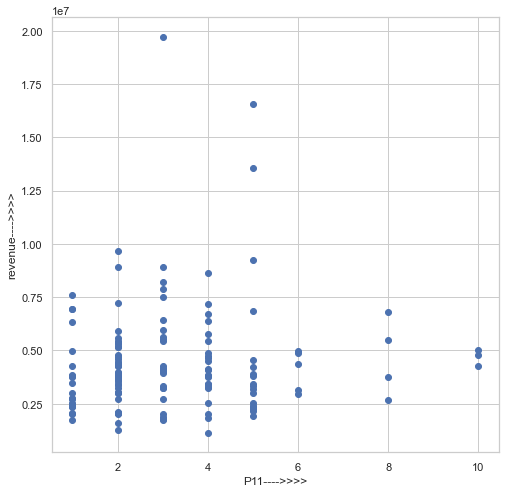

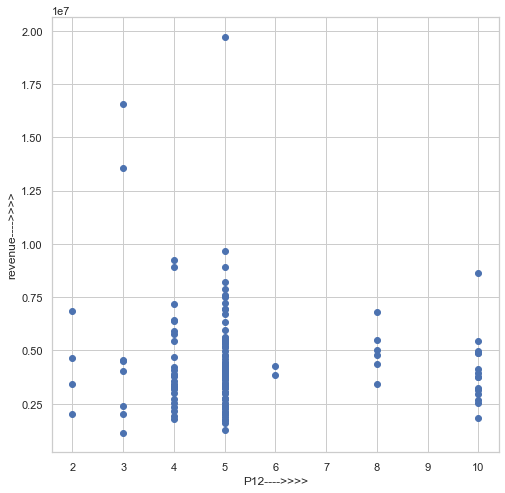

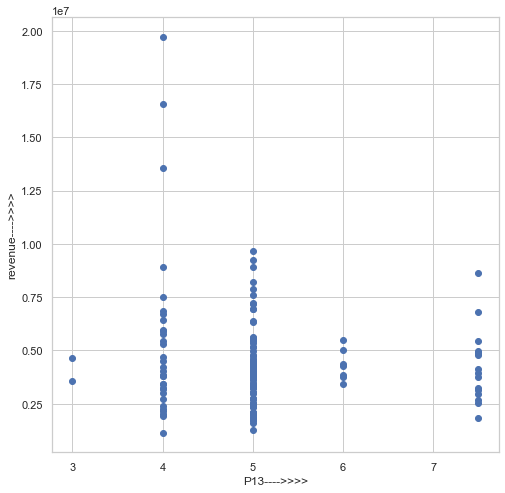

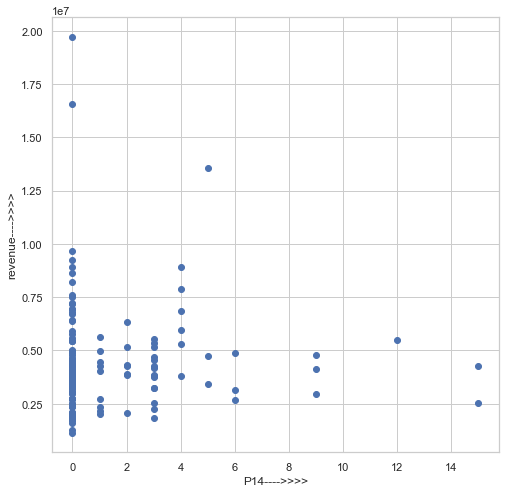

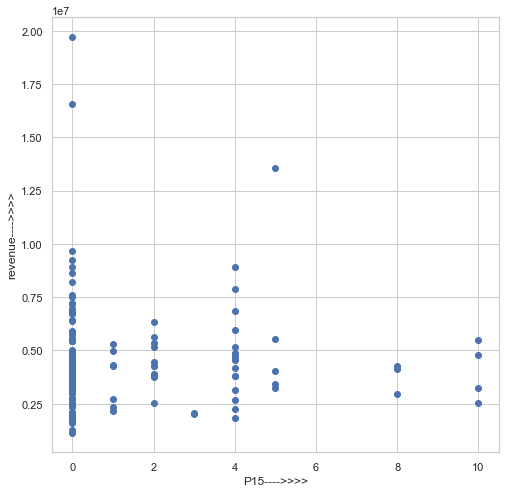

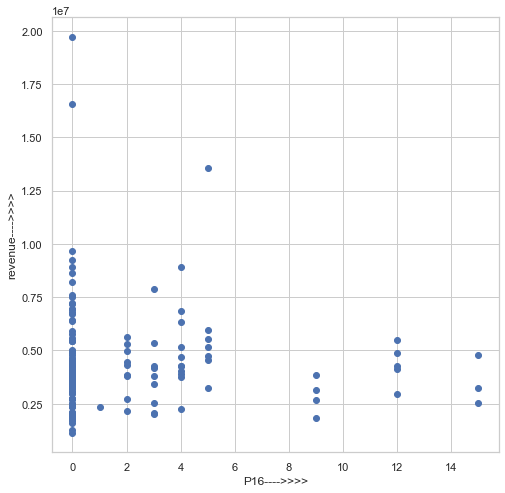

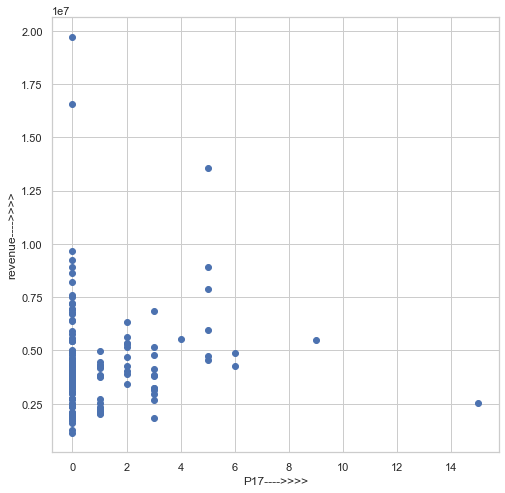

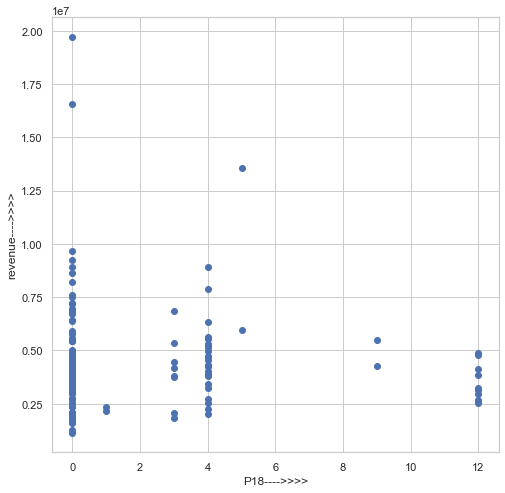

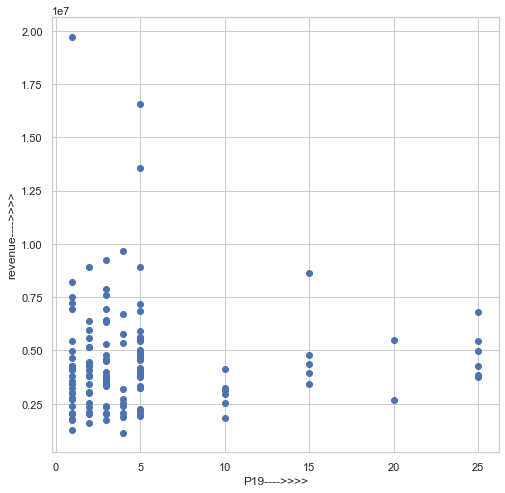

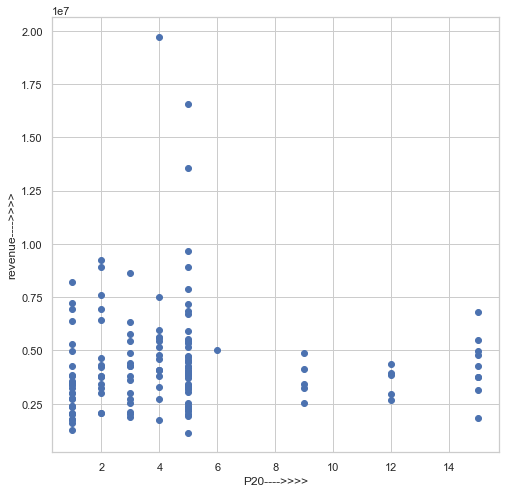

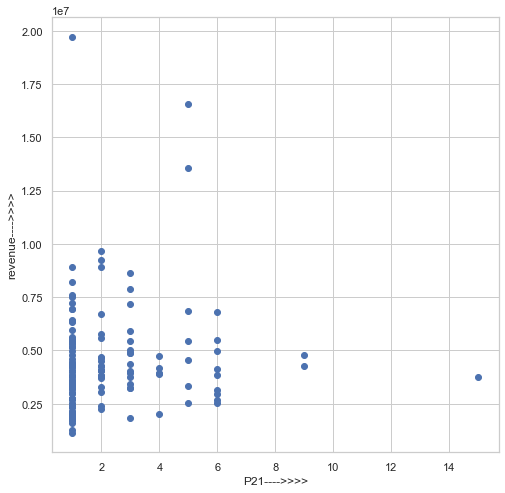

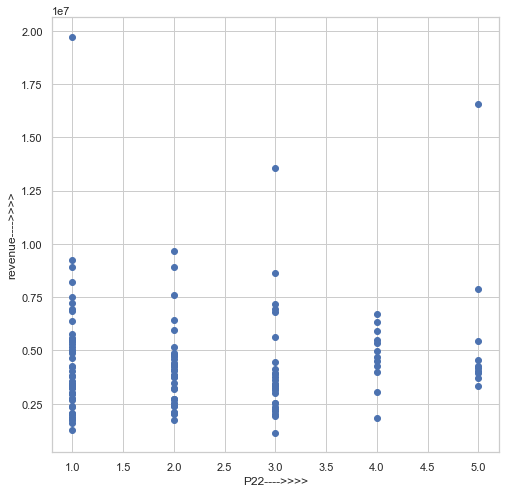

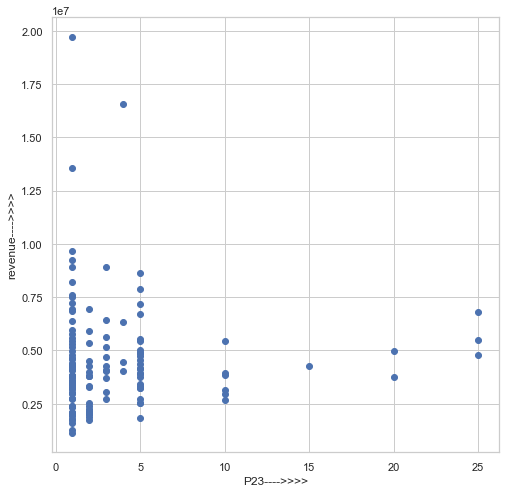

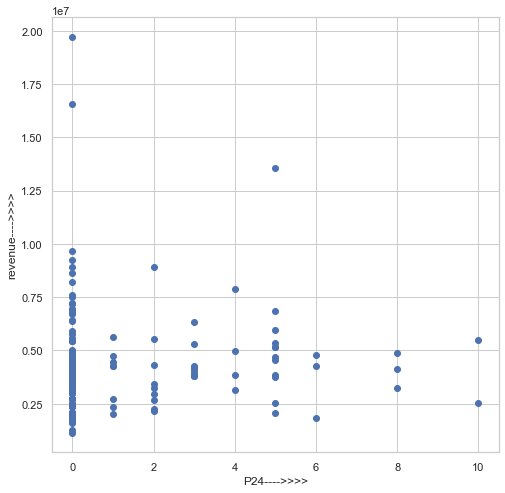

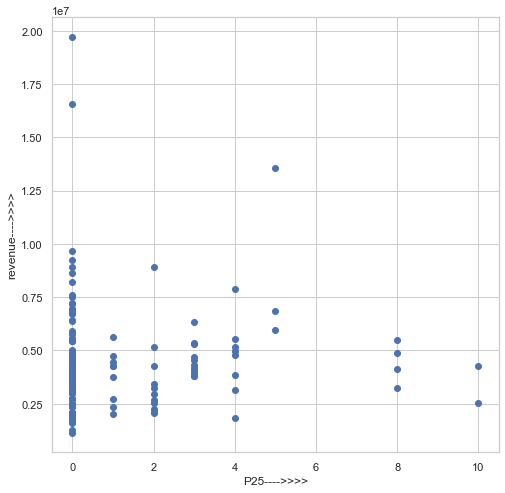

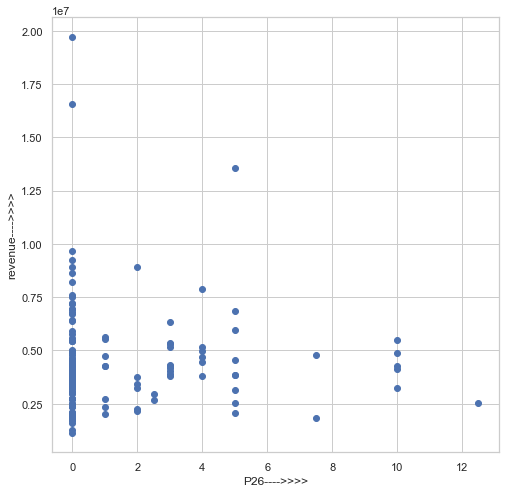

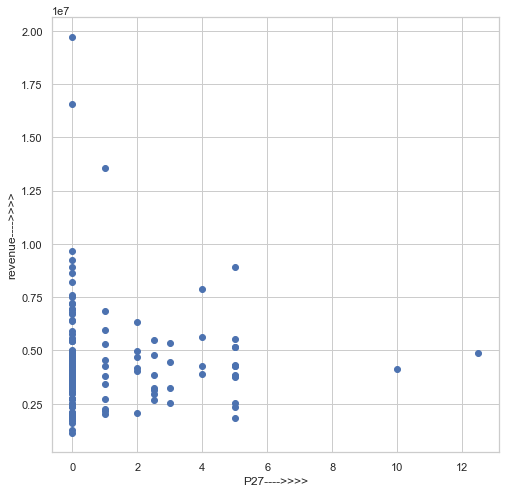

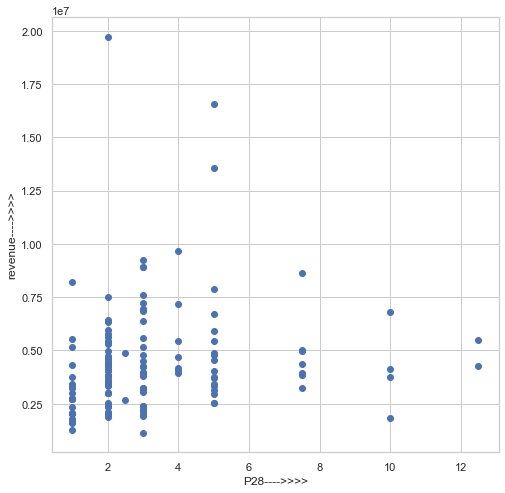

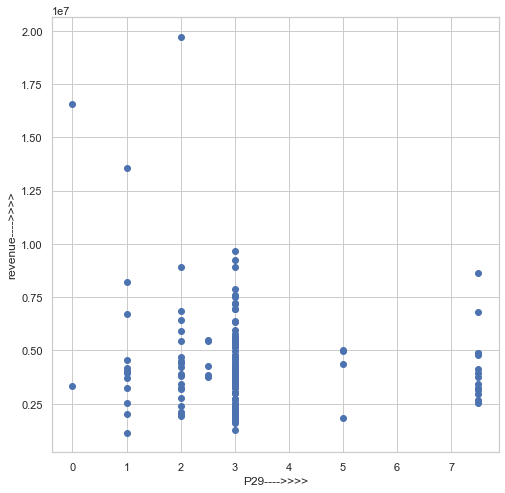

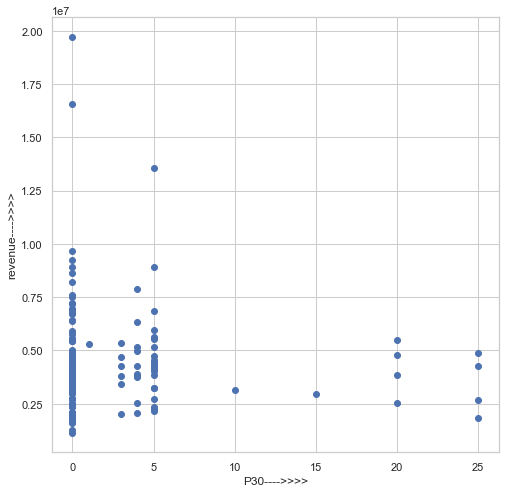

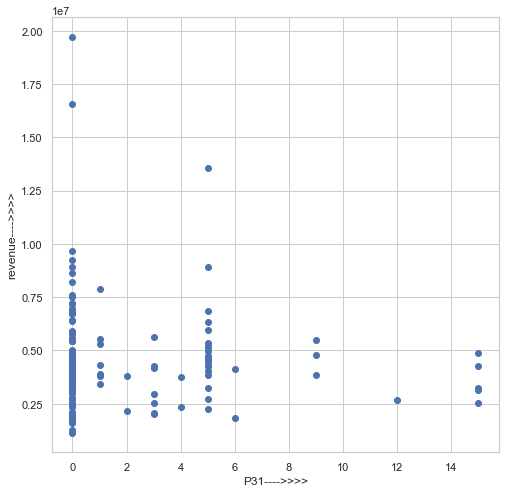

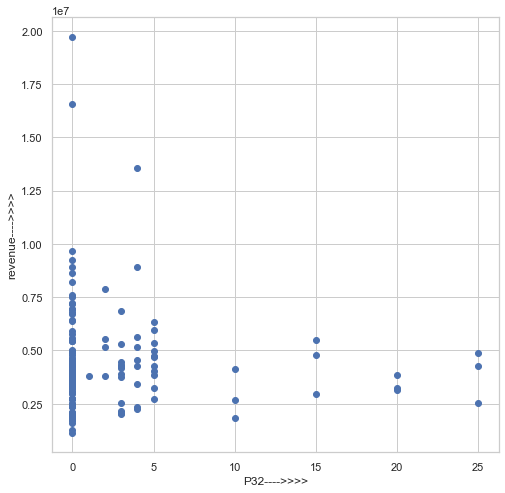

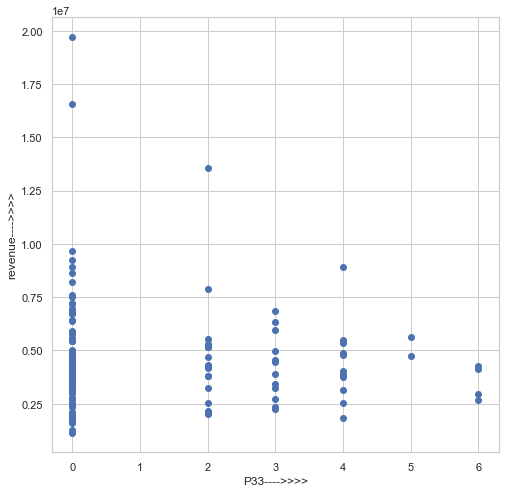

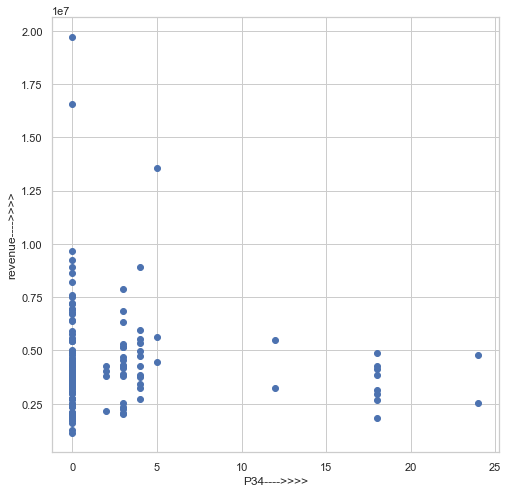

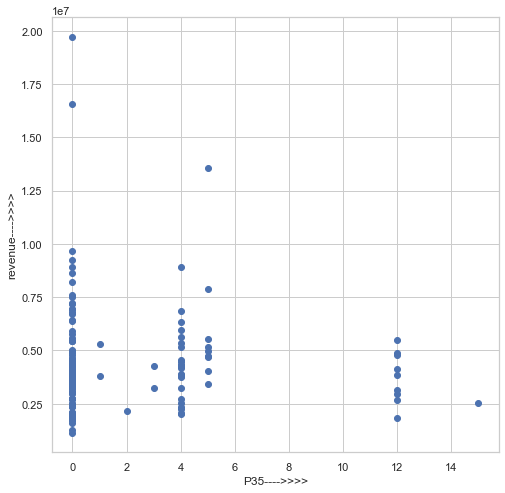

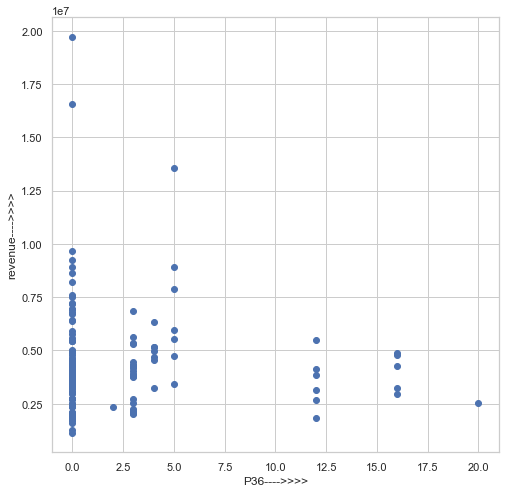

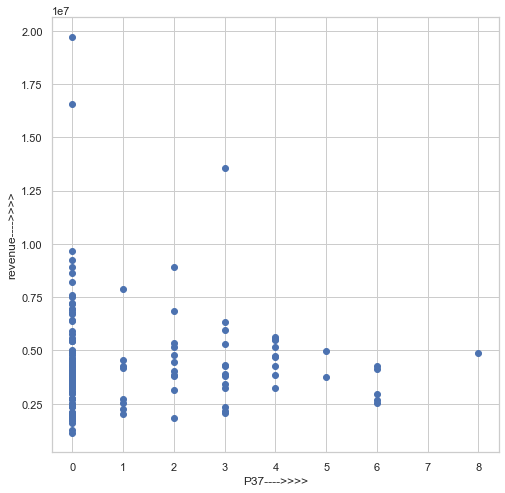

In [57]:
for i in ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37']:
    plt.figure(figsize=(8,8))
    plt.scatter(train_data[i],train_data['revenue'])
    plt.xlabel('{}---->>>>'.format(i))
    plt.ylabel('revenue---->>>>')

In [58]:
train_data.columns      

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue', 'DT', 'FC', 'IL',
       'Big Cities', 'Adana', 'Afyonkarahisar', 'Ankara', 'Antalya', 'Aydın',
       'Balıkesir', 'Bolu', 'Bursa', 'Denizli', 'Diyarbakır', 'Edirne',
       'Eskişehir', 'Gaziantep', 'Isparta', 'Kayseri', 'Kocaeli', 'Konya',
       'Kütahya', 'Kırklareli', 'Muğla', 'Sakarya', 'Samsun', 'Tekirdağ',
       'Trabzon', 'Uşak', 'İstanbul', 'İzmir', 'Şanlıurfa', 'Date', 'Month',
       'Year'],
      dtype='object')

In [59]:
test_data.columns 

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'DT', 'FC', 'IL',
       'Big Cities', 'Adana', 'Afyonkarahisar', 'Ankara', 'Antalya', 'Aydın',
       'Balıkesir', 'Bolu', 'Bursa', 'Denizli', 'Diyarbakır', 'Edirne',
       'Eskişehir', 'Gaziantep', 'Isparta', 'Kayseri', 'Kocaeli', 'Konya',
       'Kütahya', 'Kırklareli', 'Muğla', 'Sakarya', 'Samsun', 'Tekirdağ',
       'Trabzon', 'Uşak', 'İstanbul', 'İzmir', 'Şanlıurfa', 'Date', 'Month',
       'Year'],
      dtype='object')

In [60]:
features=train_data.drop('revenue',axis=1)

In [61]:
features.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,Samsun,Tekirdağ,Trabzon,Uşak,İstanbul,İzmir,Şanlıurfa,Date,Month,Year
Id,,,,,,,,,,,,,,,,,,,,,
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,0,0,0,0,1,0,0,7,17,1999
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,0,0,0,0,0,0,0,2,14,2008
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,0,0,0,0,0,0,0,3,9,2013
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,0,0,0,0,0,0,0,2,2,2012
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,0,0,0,0,0,0,0,5,9,2009


In [62]:
labels=train_data['revenue']
labels

Id
0      5653753.0
1      6923131.0
2      2055379.0
3      2675511.0
4      4316715.0
         ...    
132    5787594.0
133    9262754.0
134    2544857.0
135    7217634.0
136    6363241.0
Name: revenue, Length: 137, dtype: float64

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
model=LinearRegression()

In [65]:
model.fit(features,labels)

LinearRegression()

In [66]:
model.coef_

array([  510116.11770966,  -128508.09954843,  -203655.6365805 ,
          15501.37104449,   266630.35863315,   513371.14279499,
        -188825.50031366, -1391011.09305136,  2314949.92004248,
       -2400364.54322747,  -197097.32593256,  -200525.02099868,
        1154316.86775238,  -450813.67376315,   416063.07064199,
       -1120321.79963218,   213155.51120782,   513391.18629995,
        -178089.10212697,  -350089.70597587,   745849.03309414,
        -351253.31080842,   102474.18420723,  1391237.02880416,
         573963.12974315, -2226925.44991265,    22979.74519134,
         671599.83598252,   179990.16015546,   172552.3675853 ,
         175444.13282586,   -68214.48257277,  -636692.26180486,
         239391.46474103,  -127653.73378334,   385466.13368642,
         259846.60744678, -2079652.92905733,  1467581.98413961,
         612070.94491826,  -765291.98242409,  4975963.06607108,
          11657.10953429, -1539309.92673108,   186777.54578341,
         243043.26732493,  2886674.98822

In [67]:
pd.DataFrame(model.coef_,columns=['Coef'],index=features.columns).sort_values(by='Coef',ascending=False)[:20]

,Coef
Edirne,6.209752e+06
Adana,4.975963e+06
Gaziantep,3.559289e+06
Balıkesir,2.886675e+06
Trabzon,2.485181e+06
P9,2.314950e+06
Muğla,2.269306e+06
Tekirdağ,2.268149e+06
İzmir,1.522505e+06
FC,1.467582e+06


In [68]:
100*model.score(features,labels)

51.29242610789456

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.25,random_state=101)

In [71]:
ypred=model.predict(xtest)

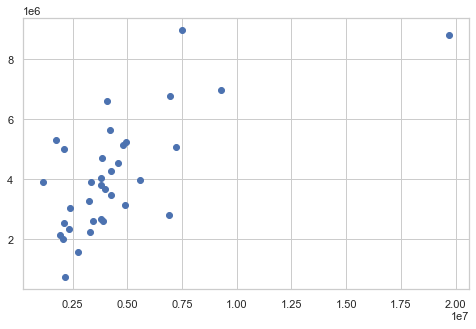

In [72]:
plt.scatter(ytest,ypred)

In [73]:
from sklearn.metrics import mean_absolute_error

In [74]:
print(mean_absolute_error(ytest,ypred))

1409474.8802780185


In [75]:
100*mean_absolute_error(ytest,ypred)/ypred[0]

26.88670214767708

In [76]:
final_model=model

In [77]:
pd.to_pickle(final_model,'Revenue Predicted')

In [80]:
features.columns

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31',
       'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'DT', 'FC', 'IL',
       'Big Cities', 'Adana', 'Afyonkarahisar', 'Ankara', 'Antalya', 'Aydın',
       'Balıkesir', 'Bolu', 'Bursa', 'Denizli', 'Diyarbakır', 'Edirne',
       'Eskişehir', 'Gaziantep', 'Isparta', 'Kayseri', 'Kocaeli', 'Konya',
       'Kütahya', 'Kırklareli', 'Muğla', 'Sakarya', 'Samsun', 'Tekirdağ',
       'Trabzon', 'Uşak', 'İstanbul', 'İzmir', 'Şanlıurfa', 'Date', 'Month',
       'Year'],
      dtype='object')

In [86]:
P29 = eval(input(''))
Year = eval(input(''))
P27 = eval(input(''))
İzmir =  eval(input(''))
İstanbul = eval(input(''))
query = pd.DataFrame({'P29':[P29],
                      'Year':[Year],
                      'P27':[P27],
                      'İzmir': [İzmir],
                      'İstanbul':[İstanbul]

})

 5
 2000
 3.5
 0
 1


In [ ]:
P29 = eval(input(''))
Year = eval(input(''))
P27 = eval(input(''))
İzmir =  eval(input(''))
İstanbul = eval(input(''))
Date = eval(input(''))
query = pd.DataFrame({
    'P29':[P29],
    'Year':[Year],
    'P27':[P27],
    'İzmir': [İzmir],
    'İstanbul': [İstanbul],
    'Date': [Date]
})